In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [2]:
cars = pd.read_csv("C:/Users/admin/Desktop/nikitha ml/cars.csv", na_values =' ')
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [3]:
cars.columns =['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand']


In [4]:
cars =cars.dropna()
cars['cubicinches'] = cars['cubicinches'].astype(int)
cars['weightlbs'] = cars['weightlbs'].astype(int)

In [5]:
cars.columns = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand']

In [6]:
cars.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [7]:
X = cars.iloc[:,:7]

In [8]:
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [9]:
X.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,23.187109,5.589844,201.351562,106.800781,3006.445312,15.496094,1976.828125
std,7.870573,1.746631,109.572151,40.686792,855.572147,2.905030,3.635575
min,10.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.800000,4.000000,100.250000,75.000000,2245.750000,14.000000,1974.000000
50%,22.000000,5.000000,156.000000,95.000000,2832.500000,16.000000,1977.000000
75%,28.850000,8.000000,304.000000,139.000000,3666.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [10]:
X_array = X.values  
X_array

array([[1.400e+01, 8.000e+00, 3.500e+02, ..., 4.209e+03, 1.200e+01,
        1.972e+03],
       [3.190e+01, 4.000e+00, 8.900e+01, ..., 1.925e+03, 1.400e+01,
        1.980e+03],
       [1.700e+01, 8.000e+00, 3.020e+02, ..., 3.449e+03, 1.100e+01,
        1.971e+03],
       ...,
       [2.200e+01, 6.000e+00, 2.320e+02, ..., 2.835e+03, 1.500e+01,
        1.983e+03],
       [1.800e+01, 6.000e+00, 2.320e+02, ..., 3.288e+03, 1.600e+01,
        1.972e+03],
       [2.200e+01, 6.000e+00, 2.500e+02, ..., 3.353e+03, 1.500e+01,
        1.977e+03]])

In [11]:
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


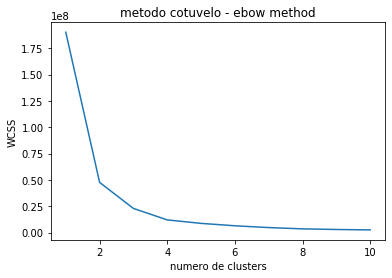

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('metodo cotuvelo - ebow method')
plt.xlabel('numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit_predict(X_array)

array([1, 0, 3, 3, 0, 3, 1, 1, 3, 0, 0, 0, 1, 3, 1, 0, 3, 0, 0, 0, 2, 2,
       1, 0, 0, 0, 1, 3, 0, 0, 3, 2, 0, 3, 0, 2, 1, 3, 1, 3, 3, 2, 2, 3,
       0, 0, 2, 1, 3, 3, 0, 1, 1, 2, 0, 0, 3, 2, 0, 2, 0, 1, 3, 0, 0, 0,
       3, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 3, 2, 0, 0, 2, 3, 0, 2, 0,
       0, 1, 3, 0, 3, 1, 2, 3, 3, 1, 1, 0, 0, 0, 2, 0, 0, 2, 3, 0, 2, 1,
       0, 0, 3, 2, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 3, 1,
       1, 0, 3, 2, 2, 2, 0, 2, 0, 3, 2, 3, 2, 3, 3, 2, 2, 1, 2, 2, 3, 0,
       0, 2, 3, 2, 1, 2, 2, 0, 3, 3, 2, 2, 0, 0, 2, 2, 0, 0, 1, 3, 3, 0,
       0, 1, 3, 0, 2, 3, 3, 1, 1, 2, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 3,
       3, 0, 3, 0, 2, 1, 2, 2, 3, 0, 0, 3, 2, 0, 1, 2, 1, 3, 2, 1, 3, 1,
       0, 1, 0, 2, 2, 3, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 3, 3,
       0, 0, 2, 0, 2, 2, 1, 2, 0, 3, 0, 2, 3, 3])

In [15]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
cars['clusters'] = kmeans.fit_predict(X_array)
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,clusters
0,14.0,8,350,165,4209,12,1972,US.,1
1,31.9,4,89,71,1925,14,1980,Europe.,0
2,17.0,8,302,140,3449,11,1971,US.,3
3,15.0,8,400,150,3761,10,1971,US.,3
4,30.5,4,98,63,2051,17,1978,US.,0


Text(0.5, 1.0, 'gastos por clusteer')

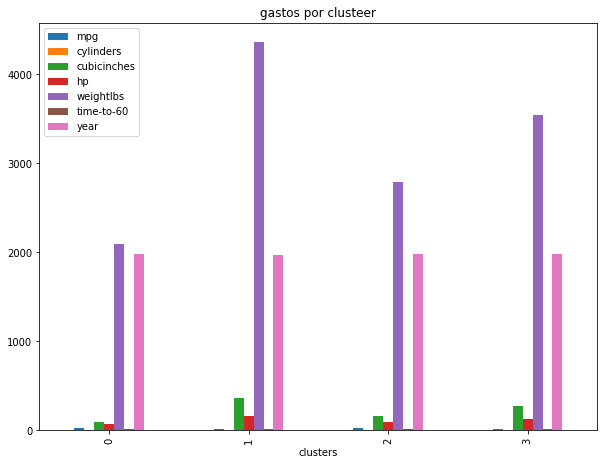

In [16]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
cars['clusters'] = kmeans.fit_predict(X_array)
cars.head()
cars.groupby("clusters").agg('mean').plot.bar(figsize=(10,7.5))
plt.title("gastos por clusteer")

In [18]:
import pandas as pd
cars = pd.read_csv("C:/Users/admin/Desktop/nikitha ml/cars.csv")